<a href="https://colab.research.google.com/github/prashant0919/Codesoft-internship/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [4]:
# Load the dataset
data = pd.read_csv('Churn_Modelling.csv')

In [5]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         9

In [6]:
# Summary statistics
print("\nSummary statistics of numerical features:")
print(data.describe())


Summary statistics of numerical features:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584  

In [7]:
# Class distribution
print("\nClass distribution of the target variable (Exited):")
print(data['Exited'].value_counts())


Class distribution of the target variable (Exited):
0    7963
1    2037
Name: Exited, dtype: int64


In [8]:
# Drop unnecessary columns (e.g., RowNumber, CustomerId, Surname, Geography, Gender)
data = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis=1)

In [9]:
# Split the dataset into features (X) and labels (y)
X = data.drop('Exited', axis=1)
y = data['Exited']

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

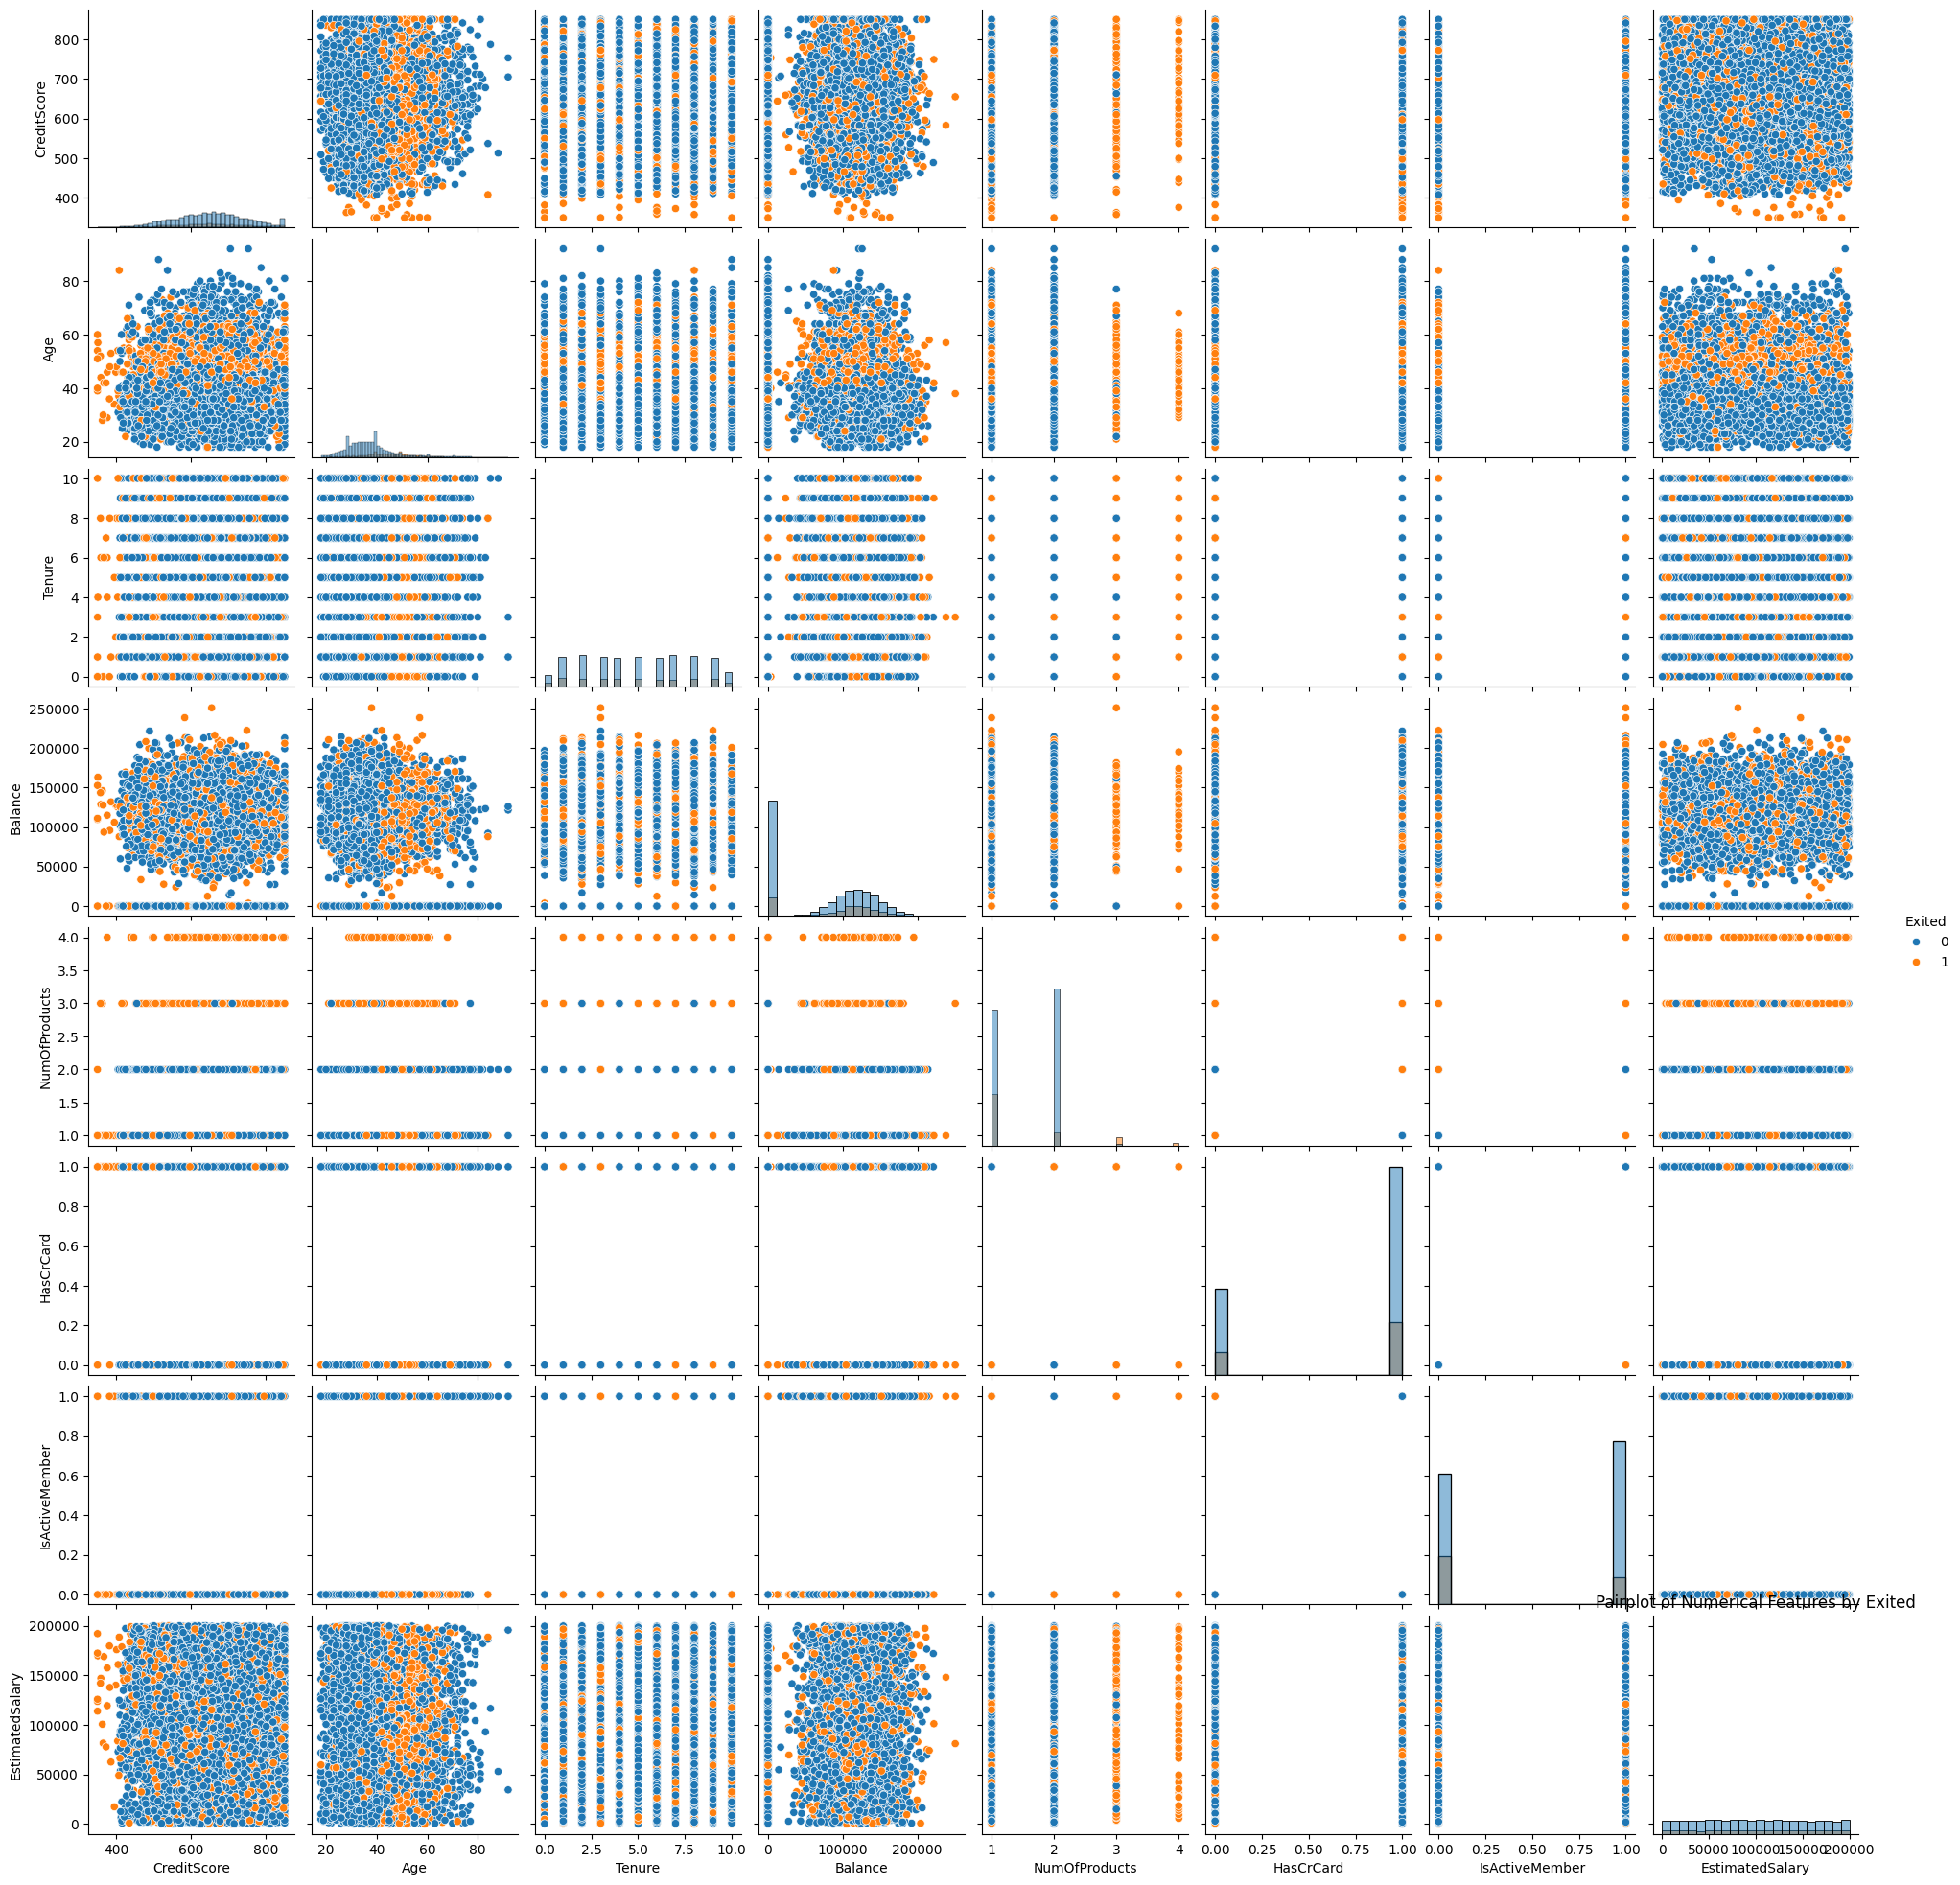

In [12]:
# Pairplot for numerical features
sns.pairplot(data, hue='Exited', diag_kind='hist')
plt.title('Pairplot of Numerical Features by Exited')
plt.show()

In [14]:
# Logistic Regression Model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [15]:
# Model Evaluation
y_pred = logistic_regression_model.predict(X_test_scaled)
print("\nLogistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression Model Evaluation:
Accuracy: 0.8095
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.56      0.15      0.24       393

    accuracy                           0.81      2000
   macro avg       0.69      0.56      0.57      2000
weighted avg       0.77      0.81      0.76      2000

Confusion Matrix:
[[1559   48]
 [ 333   60]]


In [16]:
# Random Forest Classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [17]:
# Random Forest Classifier
y_pred_random_forest = random_forest_model.predict(X_test_scaled)
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_random_forest))
print("Classification Report:")
print(classification_report(y_test, y_pred_random_forest))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_random_forest))


Random Forest Model Evaluation:
Accuracy: 0.859
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Confusion Matrix:
[[1545   62]
 [ 220  173]]


In [18]:
# Save the trained models and scaler
joblib.dump(logistic_regression_model, 'logistic_regression_model.pkl')
joblib.dump(random_forest_model, 'random_forest_model.pkl')
joblib.dump(scaler, 'standard_scaler.pkl')

['standard_scaler.pkl']

In [19]:
 # Take input from the user
print("Enter the customer details:")
credit_score = float(input("Credit Score: "))
# We will no longer require the input for Geography and Gender

age = float(input("Age: "))
tenure = float(input("Tenure: "))
balance = float(input("Balance: "))
num_of_products = float(input("Number of Products: "))
has_cr_card = float(input("Has Credit Card (0 or 1): "))
is_active_member = float(input("Is Active Member (0 or 1): "))
estimated_salary = float(input("Estimated Salary: "))

# Scale the input data
input_data = scaler.transform([[credit_score, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary]])

# Predict using logistic regression model
logistic_regression_prediction = logistic_regression_model.predict(input_data)
print("Logistic Regression Prediction:", logistic_regression_prediction)

# Predict using random forest model
random_forest_prediction = random_forest_model.predict(input_data)
print("Random Forest Prediction:", random_forest_prediction)


Enter the customer details:
Credit Score: 123
Age: 12
Tenure: 2
Balance: 122222
Number of Products: 2
Has Credit Card (0 or 1): 1
Is Active Member (0 or 1): 1
Estimated Salary: 1333333
Logistic Regression Prediction: [0]
Random Forest Prediction: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
